# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [130]:
## ADD YOUR CODE HERE
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.pipeline# adjust settings to plot nice figures inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import warnings
import sys
import sklearn.datasets as DS
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
sys.path.append('../code')
from mli import plot_digit, plot_digits



np.random.seed(42)
X, Y = make_moons(1000, noise=0.1,random_state=0)
print('X is ', X.shape)
print('Y is ', Y.shape)
# #####################################################################
# # Perform a train test split , use 20% of your dataset for testing.
# #####################################################################

# ADD YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print('training x is ', X_train.shape,'training y is', y_train.shape)
print('testing x is ', X_test.shape,'testing y is', y_test.shape)
# model.fit(X_train, y_train)
# plot_decision_boundary(model, X_test, y_test)
# #####################################################################
# # Perform a polynomial feature transform  use degree 10 to start and then explore different polynomial degrees
# #####################################################################

Pol = PolynomialFeatures(10)
x_train_poly = Pol.fit_transform(X_train)
X_test_poly = Pol.fit_transform(X_test)


# model = SGDClassifier(loss='log', penalty = 'l2')
# model.fit(x_train_poly, y_train)


X is  (1000, 2)
Y is  (1000,)
training x is  (800, 2) training y is (800,)
testing x is  (200, 2) testing y is (200,)


2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



(800, 5)
[2.04271531 0.51812416]


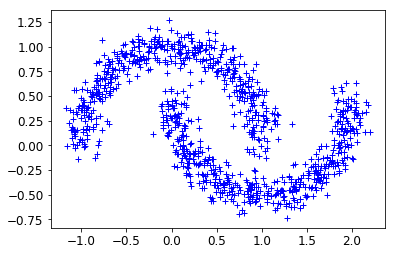

In [131]:
## ADD YOUR CODE HERE
print(x_train_poly[:, 0:5].shape)

# plt.plot(x_train_poly[:,0:5])
plt.plot(X[:,0:1],X[:,1:2],'b+')
print(X[0,0:2])
# plt.axis([200, 220, 240, 260],[-1, 0, 1, 2])
# axes = plt.gca()
# axes.set_xlim([280,300])
# axes.set_ylim([-1,5])
plt.show()

3) Use a Decision Tree to classify the data (5 points)



In [132]:
## ADD YOUR CODE HERE
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x_train_poly, y_train)


preds = clf.predict(X_test_poly)
score = accuracy_score(y_test, preds)

print(score)

0.985


4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [133]:
## ADD YOUR CODE HERE

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train_poly, y_train)


preds = clf.predict(X_test_poly)
score = accuracy_score(y_test, preds)

print(score)

0.99


5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



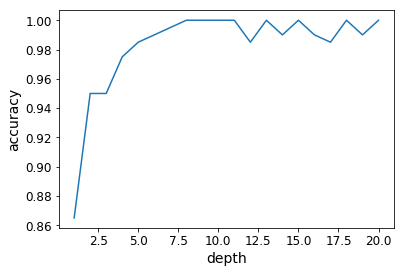

In [134]:
## ADD YOUR CODE HERE
depth = []
accur = []
for i in range(1,21):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = i)
    clf = clf.fit(x_train_poly, y_train)

    preds = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, preds)
    accur.append(accuracy)
    depth.append(i)
    
plt.plot(depth,accur)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()
    

6) How does the depth of a tree affect performance and computational burden? (1 points)



In [135]:
## ADD YOUR CODE HERE
print('due the graph the ')

due the graph the 


7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [136]:
# ## ADD YOUR CODE HERE
# import sklearn.ensemble.BaggingClassifier

# depth = []
# accur = []
# for i in range(1,21):
#     clf = BaggingClassifier(base_estimator=None，)
#     clf = clf.fit(x_train_poly, y_train)

#     preds = clf.predict(X_test_poly)
#     accuracy = (preds == y_test).mean()
#     accur.append(accuracy)
#     depth.append(i)
    
# plt.plot(depth,accur)
# plt.xlabel('tree depth')
# plt.ylabel('accuracy')
# plt.show()



# depth = []
# accur = []
# for i in range(1,21):
#     clf = BaggingClassifier(criterion='entropy')
#     clf = clf.fit(x_train_poly, y_train)

#     preds = clf.predict(X_test_poly)
#     accuracy = (preds == y_test).mean()
#     accur.append(accuracy)
#     depth.append(i)
    
# plt.plot(depth,accur)
# plt.xlabel('n_of estimators')
# plt.ylabel('accuracy')
# plt.show()


# depth = []
# accur = []
# for i in range(1,21):
#     clf = BaggingClassifier(criterion='entropy')
#     clf = clf.fit(x_train_poly, y_train)

#     preds = clf.predict(X_test_poly)
#     accuracy = (preds == y_test).mean()
#     accur.append(accuracy)
#     depth.append(i)
    
# plt.plot(depth,accur)
# plt.xlabel('max_samples ')
# plt.ylabel('accuracy')
# plt.show()

# depth = []
# accur = []
# for i in range(1,21):
#     clf = BaggingClassifier(criterion='entropy')
#     clf = clf.fit(x_train_poly, y_train)

#     preds = clf.predict(X_test_poly)
#     accuracy = (preds == y_test).mean()
#     accur.append(accuracy)
#     depth.append(i)
    
# plt.plot(depth,accur)
# plt.xlabel('max_samples ')
# plt.ylabel('accuracy')
# plt.show()



8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

In [137]:
## ADD YOUR CODE HERE
print("Whether samples are drawn with replacement.")

Whether samples are drawn with replacement.


9)  Use a Decision Forest to classify the new dataset (4 points)



In [138]:
## ADD YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(x_train_poly, y_train)

10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



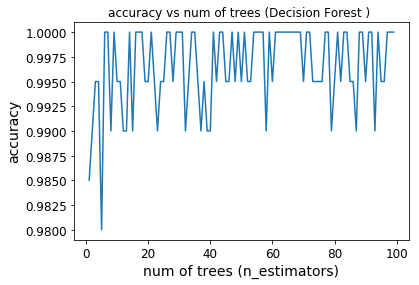

In [139]:
## ADD YOUR CODE HERE
num_trees = []
accur = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators = i)
    clf = clf.fit(x_train_poly, y_train)

    preds = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, preds)
    accur.append(accuracy)
    num_trees.append(i)

plt.plot(num_trees,accur)
plt.xlabel('num of trees (n_estimators)')
plt.ylabel('accuracy')
plt.title('accuracy vs num of trees (Decision Forest ) ')
plt.show()
    

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



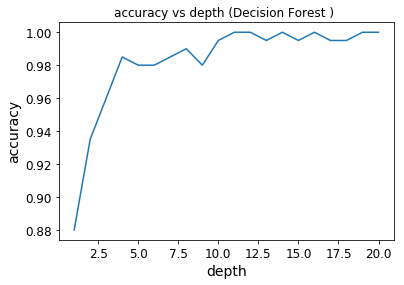

In [140]:
## ADD YOUR CODE HERE
depth = []
accur = []
for i in range(1,21):
    clf = RandomForestClassifier(max_depth = i )
    clf = clf.fit(x_train_poly, y_train)

    preds = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, preds)
    accur.append(accuracy)
    depth.append(i)
    
plt.plot(depth,accur)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy vs depth (Decision Forest ) ')
plt.show()
    

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [141]:
## ADD YOUR CODE HERE
print("while modulating depth of trees")


while modulating depth of trees


13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [143]:
## ADD YOUR CODE HERE
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                       feature_names=iris.feature_names,  
#                       class_names=iris.target_names,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [165]:
# load the data
import numpy as np
import pandas as pd

data_dir = '../code/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 784)
y_train shape (60000,)
x_test shape (10000, 784)
y_test shape (10000,)


In [166]:
## ADD YOUR CODE HERE 
#Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
############################################################################
# Extract sample digits of ones and eights
############################################################################

def sample_data_digits(data, labels, selected_digits):
    # convert input 3d arrays to 2d arrays
    nsamples, nxny = data.shape
    data_vec = np.reshape(data,(nsamples,nxny))
   
    selected_indexes = np.isin(labels, selected_digits)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==selected_digits[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels


############################################################################
# Q: extract ones and eights digits from both training and testing data 
############################################################################
selected_train_data, selected_train_labels = sample_data_digits(x_train, y_train,[0,9] )
selected_test_data, selected_test_labels = sample_data_digits(x_test, y_test,[0,9] )

clf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini', 
                             max_depth=15, 
                             bootstrap=True)

clf = clf.fit(selected_train_data, selected_train_labels)

preds = clf.predict(selected_test_data)
accuracy = accuracy_score(selected_test_labels, preds)
print(accuracy)




0.9965


In [163]:
## Train and compare an Adaboost classifier with a decision tree
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=None, 
                         n_estimators=50, 
                         learning_rate=1.0, 
                         algorithm='SAMME.R', 
                         random_state=None)

clf = clf.fit(selected_train_data, selected_train_labels)

preds = clf.predict(selected_test_data)
accuracy = accuracy_score(selected_test_labels, preds)
print(accuracy)



0.996


In [170]:
# Modulate the number of trees in the Adaboost and the depth of the trees. 
# Comment on the performance and complexity

num_trees = []
accur = []

for i in range(1,100):
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1), 
                             n_estimators=i, 
                             learning_rate=1.0, 
                             algorithm='SAMME.R', 
                             random_state=None)
    #fit the data
    clf = clf.fit(selected_train_data, selected_train_labels)
    
    #do the prediction
    preds = clf.predict(selected_test_data)
    accuracy = accuracy_score(selected_test_labels, preds)
    
    accur.append(accuracy)
    num_trees.append(i)
    
plt.plot(num_trees,accur)
plt.xlabel('num of trees (n_estimators)')
plt.ylabel('accuracy')
plt.title('accuracy vs num of trees (Decision Forest ) ')
plt.show()

# Modulate the the depth of the trees vs accuracy
depth = []
accur = []
for i in range(1,21):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), 
                             n_estimators=50, 
                             learning_rate=1.0, 
                             algorithm='SAMME.R', 
                             random_state=None)

    clf = clf.fit(selected_train_data, selected_train_labels)

    preds = clf.predict(selected_test_data)
    accuracy = accuracy_score(selected_test_labels, preds)
    preds = clf.predict(selected_test_data)
    accuracy = accuracy_score(selected_test_labels, preds)
    
    accur.append(accuracy)
    depth.append(i)
    
plt.plot(depth,accur)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy vs depth AdaBoostClassifier')
plt.show()

In [ ]:
# Train a Decsiion Forest for all classes and also compare the performance with 
# another ensemble algorithm of your choice
clf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini', 
                             max_depth=15, 
                             bootstrap=True)

clf = clf.fit(x_train, y_train)

preds = clf.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)



In [ ]:
# What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)
print("the theoretical difference between Random Forests and Adaboost classifiers are ")